### Import Necessary libraries

In [ ]:
import torch

#Check for GPU Availability
print("GPU available:", torch.cuda.is_available())

# If available, set the device to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

GPU available: True
Using device: cuda


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

#### Create Dataframe

In [ ]:
df = pd.read_csv("Train data.csv")

### Exploratory Data Analysis

In [ ]:
df.head()

,category,headline,text,url
0,business,Vechidiki Voita Ongororo Inobata Kushaikwa kwe...,Apo veruzhinji vari kuramba vachinetseka nekus...,https://www.voashona.com/a/zimbabwe-youths-emb...
1,business,Vashandi vepaMugodhi weShamva Gold Mine Voramw...,"Vashandi vepamugodhi weShamva Gold Mine, vanon...",https://www.voashona.com/a/zimbabwe-matongerwo...
2,business,Zimbabwe Youmba Komiti Inotsvaka Nzira Dzekush...,Hurumende yaumba komiti ichaona kuti Zimbabwe ...,https://www.voashona.com/a/zimbababwe-politics...
3,business,Zimpapers Yoshorwa neKudzinga Vashandi Mabasa ...,Masangano anomirira vatapi venhau munyika anot...,https://www.voashona.com/a/zimbabwe-zimpapers-...
4,business,Masangano Akazvimirira Okurudzira Vanhu Kuti V...,Vemasangano akazvimirira vakabvumirana nhemusi...,https://www.voashona.com/a/zimbabwe-matongerwo...


In [ ]:
df.shape

(369, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0    category  369 non-null    object
 1   headline   369 non-null    object
 2   text       369 non-null    object
 3   url        369 non-null    object
dtypes: object(4)
memory usage: 11.7+ KB


In [ ]:
df[' category'].value_counts()

In [ ]:
#check for unique values in the categories column
df[' category'].unique()

array(['business', 'health', 'politics', 'sports'], dtype=object)

In [ ]:
# drop url column
df = df.drop(['url'],axis = 1)

In [ ]:
df.head()

,category,headline,text
0,business,Vechidiki Voita Ongororo Inobata Kushaikwa kwe...,Apo veruzhinji vari kuramba vachinetseka nekus...
1,business,Vashandi vepaMugodhi weShamva Gold Mine Voramw...,"Vashandi vepamugodhi weShamva Gold Mine, vanon..."
2,business,Zimbabwe Youmba Komiti Inotsvaka Nzira Dzekush...,Hurumende yaumba komiti ichaona kuti Zimbabwe ...
3,business,Zimpapers Yoshorwa neKudzinga Vashandi Mabasa ...,Masangano anomirira vatapi venhau munyika anot...
4,business,Masangano Akazvimirira Okurudzira Vanhu Kuti V...,Vemasangano akazvimirira vakabvumirana nhemusi...


In [ ]:
# Check for duplicate records
df[df.duplicated()== True]

,category,headline,text


In [ ]:
# rename categories column to remove blank space before the label
df = df.rename(columns = {' category':'categories'},)

###  Text Preprocessing

In [ ]:
# convert text into lower case and drop duplicate columns
df['text1'] = df['text'].str.lower()
df['headline1']=df['headline'].str.lower()
df = df.drop(['text','headline'],axis = 1)
df.head()

,categories,text1,headline1
0,business,apo veruzhinji vari kuramba vachinetseka nekus...,vechidiki voita ongororo inobata kushaikwa kwe...
1,business,"vashandi vepamugodhi weshamva gold mine, vanon...",vashandi vepamugodhi weshamva gold mine voramw...
2,business,hurumende yaumba komiti ichaona kuti zimbabwe ...,zimbabwe youmba komiti inotsvaka nzira dzekush...
3,business,masangano anomirira vatapi venhau munyika anot...,zimpapers yoshorwa nekudzinga vashandi mabasa ...
4,business,vemasangano akazvimirira vakabvumirana nhemusi...,masangano akazvimirira okurudzira vanhu kuti v...


In [ ]:
import string


In [ ]:
# Variable that contains all punctuations
punctuation= string.punctuation

In [ ]:
#Create a function to remove punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',punctuation))

In [ ]:
#use lambda to call the function created above
df['text1'] = df['text1'].apply(lambda x:remove_punc(x))
df['headline1'] = df['headline1'].apply(lambda x:remove_punc(x))
df.head()

,categories,text1,headline1
0,business,apo veruzhinji vari kuramba vachinetseka nekus...,vechidiki voita ongororo inobata kushaikwa kwe...
1,business,vashandi vepamugodhi weshamva gold mine vanonz...,vashandi vepamugodhi weshamva gold mine voramw...
2,business,hurumende yaumba komiti ichaona kuti zimbabwe ...,zimbabwe youmba komiti inotsvaka nzira dzekush...
3,business,masangano anomirira vatapi venhau munyika anot...,zimpapers yoshorwa nekudzinga vashandi mabasa ...
4,business,vemasangano akazvimirira vakabvumirana nhemusi...,masangano akazvimirira okurudzira vanhu kuti v...


In [ ]:
#remove stopwords
stopwords= pd.read_csv("stopwords.csv")
shona_stopwords= stopwords["Stopwords"].tolist()# convert csv with stopwords to list
shona_stopwords=[x.strip(' ') for x in shona_stopwords]# remove all leading and trailing white spaces using list comprehension
shona_stopwords

['asi',
 'vano',
 'kuti',
 'sezvo',
 'kuita',
 'ne',
 'che',
 'cha',
 'muma',
 'aya',
 'ma',
 'ro',
 'ichi',
 've',
 'nemu',
 'kana',
 'chi',
 'avo',
 'va',
 'vaka',
 'mu',
 'ona',
 'chi',
 'uyu',
 'we',
 'ra',
 'neva',
 've',
 'mwe',
 'zva',
 'izvi',
 'zvi',
 'rino',
 'muna',
 'uye',
 'yavo',
 'pa',
 'vano',
 'vari',
 'ku',
 'ti',
 're',
 'ino',
 'pasi',
 'vati',
 'mu',
 'wo',
 'nema',
 'ari',
 'iri',
 'zviri',
 'kuma',
 'ku',
 'vamwe',
 'pa',
 'neku',
 'asi',
 'mbo',
 'ya',
 'dze',
 'ma',
 'zvino',
 'chete',
 'vachi',
 'ri',
 'zve',
 'dzi',
 'dza',
 'dza',
 'ra',
 'rwa',
 'va',
 'ava',
 'of',
 'aka',
 'ano',
 'kwa',
 'kwe',
 'ta',
 'pe',
 'zvaka',
 'iyi',
 'zvi',
 'dzwa',
 'ye',
 'yeku',
 'yaka',
 'iyo',
 're',
 'sa',
 'i',
 'wa',
 'kwa',
 'ravo',
 'media',
 'source',
 'currently',
 'available',
 'unavailable',
 'vanoti',
 'apo',
 'nekuti',
 'anoti',
 'uyo',
 'saka',
 'iye',
 'anodaro',
 'isu']

In [ ]:
def remove_shona_stopwords(text, shona_stopwords):
    words = text.split()  #splits the text into individual words
    cleaned_text = [word for word in words if word.lower() not in shona_stopwords]  # Remove stopwords
    return " ".join(cleaned_text)  # Join the cleaned words back into a single string

In [ ]:
df['text1'] = df['text1'].apply(lambda x:remove_shona_stopwords(x,shona_stopwords))# x as the input value
df['headline1'] = df['headline1'].apply(lambda x:remove_shona_stopwords(x,shona_stopwords))
df.head(10)

,categories,text1,headline1
0,business,veruzhinji kuramba vachinetseka nekushaya mari...,vechidiki voita ongororo inobata kushaikwa kwe...
1,business,vashandi vepamugodhi weshamva gold mine vanonz...,vashandi vepamugodhi weshamva gold mine voramw...
2,business,hurumende yaumba komiti ichaona zimbabwe yabha...,zimbabwe youmba komiti inotsvaka nzira dzekush...
3,business,masangano anomirira vatapi venhau munyika haas...,zimpapers yoshorwa nekudzinga vashandi mabasa ...
4,business,vemasangano akazvimirira vakabvumirana nhemusi...,masangano akazvimirira okurudzira vanhu varamb...
5,business,gurukota rezvekushanyirwa kwenyika amai prisca...,amai prisca mupfumi nevamwe voita misangano mu...
6,business,guta rebulawayo rinoti harizi kuzosiya zvivakw...,kanzuru yebulawayo yoendesa zesa kumatare edzi...
7,business,kwasara zuva rimwechete vanhu vapinde muzororo...,vemabhizimusi madiki vochema nekusafamba kwebh...
8,business,zimbabwe yakatarisana nedambudziko guru rekush...,zimbabwe yotarisana nedambudziko rekushomeka k...
9,business,muzvinabhizimisi wicknell chivhayo nemusi wemu...,vachivhayo vooneswa ndondo nenyaya yehuori mud...


In [ ]:
# remove special characters
import re
def remove_special_char(text):
    if not isinstance(text, str):
        return ''
    text = re.sub('[^a-zA-Z0-9]', ' ',text)
    text = re.sub('\s+', ' ',text)#replace any additional spaces with a single space
    return text

In [ ]:
df['text1'] = df['text1'].apply(lambda x: remove_special_char(x))
df['headline1'] = df['headline1'].apply(lambda x: remove_special_char(x))
df.head(5)

,categories,text1,headline1
0,business,veruzhinji kuramba vachinetseka nekushaya mari...,vechidiki voita ongororo inobata kushaikwa kwe...
1,business,vashandi vepamugodhi weshamva gold mine vanonz...,vashandi vepamugodhi weshamva gold mine voramw...
2,business,hurumende yaumba komiti ichaona zimbabwe yabha...,zimbabwe youmba komiti inotsvaka nzira dzekush...
3,business,masangano anomirira vatapi venhau munyika haas...,zimpapers yoshorwa nekudzinga vashandi mabasa ...
4,business,vemasangano akazvimirira vakabvumirana nhemusi...,masangano akazvimirira okurudzira vanhu varamb...


In [ ]:
#remove any url
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+','',text)

In [ ]:
df['text1'] = df['text1'].apply(lambda x: remove_url(x))
df['headline1'] = df['headline1'].apply(lambda x: remove_url(x))


In [ ]:
#remove any html tags that might be in the dataset
def remove_tags(text):
    return re.sub(r'<.*?>','',text)

In [ ]:
df['text1'] = df['text1'].apply(lambda x: remove_tags(x))
df['headline1'] = df['headline1'].apply(lambda x: remove_tags(x))


## Visualisation per category

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import matplotlib.image as mpimg
import seaborn as sn

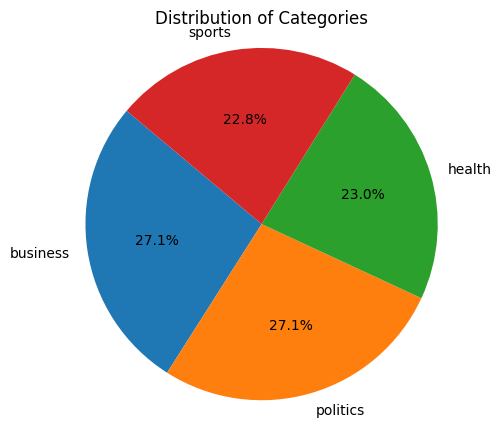

In [ ]:
value_counts = df['categories'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal ensures that pie is drawn as a circle.
plt.show()

## Tokenization

In [ ]:
# break down text into smaller units known as tokens
#Model_1 -----> BantuBerta tokenizer
from transformers import AutoTokenizer, RobertaModel

model_name="dsfsi/BantuBERTa"


model = RobertaModel.from_pretrained(model_name)
tokenizer =  AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/708 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/446M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at dsfsi/BantuBERTa and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer.json:   0%|          | 0.00/2.97M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/446M [00:00<?, ?B/s]

In [ ]:
df['tokenized_tcolumn'] = df['text1'].apply(lambda x: tokenizer.encode(x,padding='max_length',max_length= 512,truncation=True,return_tensors='pt'))
df['tokenized_hcolumn'] = df['headline1'].apply(lambda x: tokenizer.encode(x,padding=True,return_tensors='pt'))
df.head()

,categories,text1,headline1,tokenized_tcolumn,tokenized_hcolumn
0,business,veruzhinji kuramba vachinetseka nekushaya mari...,vechidiki voita ongororo inobata kushaikwa kwe...,"[[tensor(632), tensor(6030), tensor(5267), ten...","[[tensor(357), tensor(57985), tensor(1269), te..."
1,business,vashandi vepamugodhi weshamva gold mine vanonz...,vashandi vepamugodhi weshamva gold mine voramw...,"[[tensor(350), tensor(1809), tensor(1094), ten...","[[tensor(350), tensor(1809), tensor(1094), ten..."
2,business,hurumende yaumba komiti ichaona zimbabwe yabha...,zimbabwe youmba komiti inotsvaka nzira dzekush...,"[[tensor(13644), tensor(323), tensor(19566), t...","[[tensor(4874), tensor(1046), tensor(392), ten..."
3,business,masangano anomirira vatapi venhau munyika haas...,zimpapers yoshorwa nekudzinga vashandi mabasa ...,"[[tensor(42599), tensor(1104), tensor(8001), t...","[[tensor(298), tensor(1083), tensor(5578), ten..."
4,business,vemasangano akazvimirira vakabvumirana nhemusi...,masangano akazvimirira okurudzira vanhu varamb...,"[[tensor(357), tensor(42599), tensor(29016), t...","[[tensor(42599), tensor(29016), tensor(8001), ..."


### CONTRASTIVE LEARNING

##### Positive and negative Pairing based on their categories

In [ ]:
import numpy as np
import pandas as pd
import time

start_time = time.time()

# Initialize an empty list to store the generated triplets
results = []

# Iterate over each row in the DataFrame
for i, (text1, category1, tokenized_tcolumn1) in enumerate(zip(df['text1'], df['categories'], df['tokenized_tcolumn'])):
    # Iterate over all subsequent rows to avoid duplicate pairs
    for j in range(i + 1, len(df)):
        text2, category2, tokenized_tcolumn2 = df.iloc[j][['text1', 'categories', 'tokenized_tcolumn']]

        if category1 == category2:  # Same category = positive pair
            # Find a random negative pair (from different category)
            negative_category = np.random.choice([c for c in df['categories'].unique() if c != category1])
            negative_text = df[df['categories'] ==negative_category].sample(n=1)['text1'].iloc[0]
            negative_tokenized = df[df['categories'] == negative_category].sample(n=1)['tokenized_tcolumn'].iloc[0]


            results.append({
                'anchor': text1,
                'positive': text2,
                'negative': negative_text,
                'tcolumn_anchor': tokenized_tcolumn1,
                'tcolumn_positive': tokenized_tcolumn2,
                'tcolumn_negative': negative_tokenized,
                'anchor_category': category1
            })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)


print("My program took", time.time() - start_time, "to run")


My program took 40.91137456893921 to run


In [ ]:
results_df.shape

(16956, 7)

In [ ]:
results_df.tail()

,anchor,positive,negative,tcolumn_anchor,tcolumn_positive,tcolumn_negative,anchor_category
16951,makundano eworld cup qatar 2022 asvika kumagum...,shasha yakambonetsa munhabvu moses bambo chung...,munyori mukuru mubazi rezvekuburitswa kwemasho...,"[[tensor(290), tensor(644), tensor(43597), ten...","[[tensor(19905), tensor(1380), tensor(329), te...","[[tensor(295), tensor(541), tensor(20150), ten...",sports
16952,makundano eworld cup qatar 2022 asvika kumagum...,team zimbabwe irikudzoka kumba isina chayakaba...,vagari vemudhorobha rechiredzi nenzvimbo dzaka...,"[[tensor(290), tensor(644), tensor(43597), ten...","[[tensor(25101), tensor(3321), tensor(1349), t...","[[tensor(13644), tensor(426), tensor(64475), t...",sports
16953,makundano echibuku super cup ar ikupinda musem...,shasha yakambonetsa munhabvu moses bambo chung...,zimbabwe imwe yenyika gumi neshanu dzakavhota ...,"[[tensor(290), tensor(644), tensor(43597), ten...","[[tensor(19905), tensor(1380), tensor(329), te...","[[tensor(644), tensor(6036), tensor(38021), te...",sports
16954,makundano echibuku super cup ar ikupinda musem...,team zimbabwe irikudzoka kumba isina chayakaba...,mutungamiri webato rinopikisa remdc vanelson c...,"[[tensor(290), tensor(644), tensor(43597), ten...","[[tensor(25101), tensor(3321), tensor(1349), t...","[[tensor(347), tensor(9098), tensor(488), tens...",sports
16955,shasha yakambonetsa munhabvu moses bambo chung...,team zimbabwe irikudzoka kumba isina chayakaba...,nhengo yezanupf politburo vamunyaradzi paul ma...,"[[tensor(19905), tensor(1380), tensor(329), te...","[[tensor(25101), tensor(3321), tensor(1349), t...","[[tensor(21467), tensor(9213), tensor(294), te...",sports


In [ ]:

results_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   anchor            16956 non-null  object
 1   positive          16956 non-null  object
 2   negative          16956 non-null  object
 3   tcolumn_anchor    16956 non-null  object
 4   tcolumn_positive  16956 non-null  object
 5   tcolumn_negative  16956 non-null  object
 6   anchor_category   16956 non-null  object
dtypes: object(7)
memory usage: 927.4+ KB


In [ ]:
print(results_df.dtypes)


anchor              object
positive            object
negative            object
tcolumn_anchor      object
tcolumn_positive    object
tcolumn_negative    object
anchor_category     object
dtype: object


In [ ]:
# Check for duplicates
duplicate_rows_text = results_df[['anchor', 'positive', 'negative', 'anchor_category']].duplicated()
print(results_df[duplicate_rows_text])


Empty DataFrame
Columns: [anchor, positive, negative, tcolumn_anchor, tcolumn_positive, tcolumn_negative, anchor_category]
Index: []


In [ ]:
from torch.utils.data import DataLoader,Dataset
class TripletDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        anchor_input = self.df.iloc[idx]['tcolumn_anchor'].clone().detach().long().squeeze()
        positive_input = self.df.iloc[idx]['tcolumn_positive'].clone().detach().long().squeeze()
        negative_input = self.df.iloc[idx]['tcolumn_negative'].clone().detach().long().squeeze()

        anchor_attention_mask = (anchor_input != 0).long()
        positive_attention_mask = (positive_input != 0).long()
        negative_attention_mask = (negative_input != 0).long()

        return {
            'anchor_input_ids': anchor_input,
            'positive_input_ids': positive_input,
            'negative_input_ids': negative_input,
            'anchor_attention_mask': anchor_attention_mask,
            'positive_attention_mask': positive_attention_mask,
            'negative_attention_mask': negative_attention_mask
        }


In [ ]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
# Data splitting using SKlearn
train_df, eval_df = train_test_split(results_df, test_size=0.2, random_state=42)

# create  datasets from the splitting process
train_dataset = TripletDataset(df=train_df)
eval_dataset = TripletDataset(df=eval_df)

# Create DataLoaders for both train and evaluation sets
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=32, shuffle=False)



**A loss function that mimics the way we as humans learn and adjust to new information**

In [ ]:
import torch
import torch.nn as nn
class CustomTripletLoss(nn.Module):
    def __init__(self, lambda_param=1.5, base_delta=0.55, delta_step=0.01):
        super().__init__()
        self.lambda_param = lambda_param
        self.base_delta = base_delta
        self.delta_step = delta_step  #This shows how much the margin is going to change
        self.current_delta = base_delta
        self.step_counter = 0
        self.update_interval = 100  # Update the delta every 100 steps depending on the current_margin

    def forward(self, anchor, positive, negative):
        sim_ap = nn.functional.cosine_similarity(anchor, positive)
        sim_an = nn.functional.cosine_similarity(anchor, negative)

        # Calculate current margin
        current_margin = torch.mean(sim_ap - sim_an).item()

        # Automatically adjust delta and ensure that the margin is not too low or too high
        if self.step_counter % self.update_interval == 0:
            if current_margin > self.current_delta:
                self.current_delta = min(0.8, self.current_delta + self.delta_step) # If well separated, increase margin which helps the model continue improving and prevent Overfitting on Easy Shona triplets
                else:
                self.current_delta = max(0.4, self.current_delta - self.delta_step * 0.5) # If not well separated decrease margin  which prevents the model from collapsing and if margin becomes 0 then it becomes meaningless

        self.step_counter += 1

        # Calculate the loss
        loss_term_1 = -torch.log(torch.exp(sim_ap) / (torch.exp(sim_ap) + torch.exp(sim_an))) # this is to make sure that The similarity between the Anchor Positive will always be greater than that between Anchor and negative
        loss_term_2 = self.lambda_param * torch.relu(sim_an - self.current_delta) # this is a loss that will be activated when similarity between AN is greater than the current margin making it a hard negative

        return (loss_term_1 + loss_term_2).mean()

In [ ]:
loss_fn = CustomLoss(
    lambda_param=1.0,
    base_delta=0.55,
    delta_step=0.01
)


In [ ]:
from transformers import Trainer
import torch

class CustomTrainer(Trainer):
    def __init__(self, *args, triplet_loss_fn=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.triplet_loss_fn = triplet_loss_fn

    def compute_loss(self, model, inputs, return_outputs=False,num_items_in_batch=None):
        # Extract inputs
        anchor_input_ids = inputs['anchor_input_ids']
        positive_input_ids = inputs['positive_input_ids']
        negative_input_ids = inputs['negative_input_ids']
        anchor_attention_mask = inputs['anchor_attention_mask']
        positive_attention_mask = inputs['positive_attention_mask']
        negative_attention_mask = inputs['negative_attention_mask']

        # Get embeddings for each input
        anchor_outputs = model(input_ids=anchor_input_ids, attention_mask=anchor_attention_mask)
        positive_outputs = model(input_ids=positive_input_ids, attention_mask=positive_attention_mask)
        negative_outputs = model(input_ids=negative_input_ids, attention_mask=negative_attention_mask)

        # Mean pooling to get sentence embeddings
        anchor_embeddings = anchor_outputs.last_hidden_state.mean(dim=1)
        positive_embeddings = positive_outputs.last_hidden_state.mean(dim=1)
        negative_embeddings = negative_outputs.last_hidden_state.mean(dim=1)

        # Compute triplet loss
        loss = self.triplet_loss_fn(anchor_embeddings, positive_embeddings, negative_embeddings)

        return (loss, None) if return_outputs else loss

    def prediction_step(self, model, inputs, prediction_loss_only=False, ignore_keys=None):
        # Ensure no gradients during evaluation
        with torch.no_grad():
            loss = self.compute_loss(model, inputs)

        return (loss, None, None)

In [ ]:
from transformers import TrainingArguments
finetuned_model_name = "ContrastedBantuBerta10"
# Define training arguments
training_args = TrainingArguments(
    output_dir=f"models/{finetuned_model_name}",
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=2,
    learning_rate=4e-5,
    weight_decay=0.001,
    warmup_steps=100,
    lr_scheduler_type="linear",

    # Optimization and logging
    fp16=True,
    logging_dir='./logs',
    logging_steps=2000,
    eval_strategy="steps",
    eval_steps=2000,

    # Checkpoint settings
    save_strategy="steps",
    save_steps=2000,
    save_total_limit=2,
    load_best_model_at_end=True,
    save_on_each_node=True,
    greater_is_better=False,
    ddp_find_unused_parameters=False,

    # Other parameters
    remove_unused_columns=False,
    report_to="none",
    metric_for_best_model="eval_loss",
)

In [ ]:
model.config.output_hidden_states = True
model = model.to(device)

In [ ]:
from transformers import EarlyStoppingCallback

# Add the EarlyStoppingCallback in the Trainer
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=3)  # Patience of 3 steps


In [ ]:
# Initialize the trainer
trainer = CustomTrainer(
    model=model,  # pre-trained model
    args=training_args,  #  training arguments
    train_dataset=train_dataset,  # Use the training split ds
    eval_dataset=eval_dataset,  # Use the evaluation split ds
    triplet_loss_fn=loss_fn,# the custom loss function
    callbacks=[early_stopping_callback]
)

In [ ]:
import time
start_time = time.time()
trainer.train()
print("My program took", time.time() - start_time, "seconds to run")

Could not estimate the number of tokens of the input, floating-point operations will not be computed


Step,Training Loss,Validation Loss
2000,0.251800,0.234061


In [ ]:
model.save_pretrained("/content/drive/MyDrive/models/ContrastedBantuBerta10")

In [ ]:
from google.colab import drive

drive.mount('/content/drive/phylissmav')


model_save_path = "/content/drive/phylissmav/MyDrive/models/ContrastedBantuBerta10"
tokenizer_save_path = "/content/drive/phylissmav/MyDrive/tokenizer/ContrastedBantuBerta10"
# Save model
trainer.save_model(model_save_path)
tokenizer.save_pretrained(tokenizer_save_path)
# Verify files
!ls -l {model_save_path}

In [ ]:
tokenizer_save_path = "/content/drive/phylissmav/MyDrive/tokenizer/ContrastedBantuBerta10"


In [ ]:
tokenizer.save_pretrained(tokenizer_save_path)